<div class="alert alert-block alert-info" align=center><b></b>

# PART -2 

# Sentiment Analysis of “The Lion King (2019)” Movie Reviews

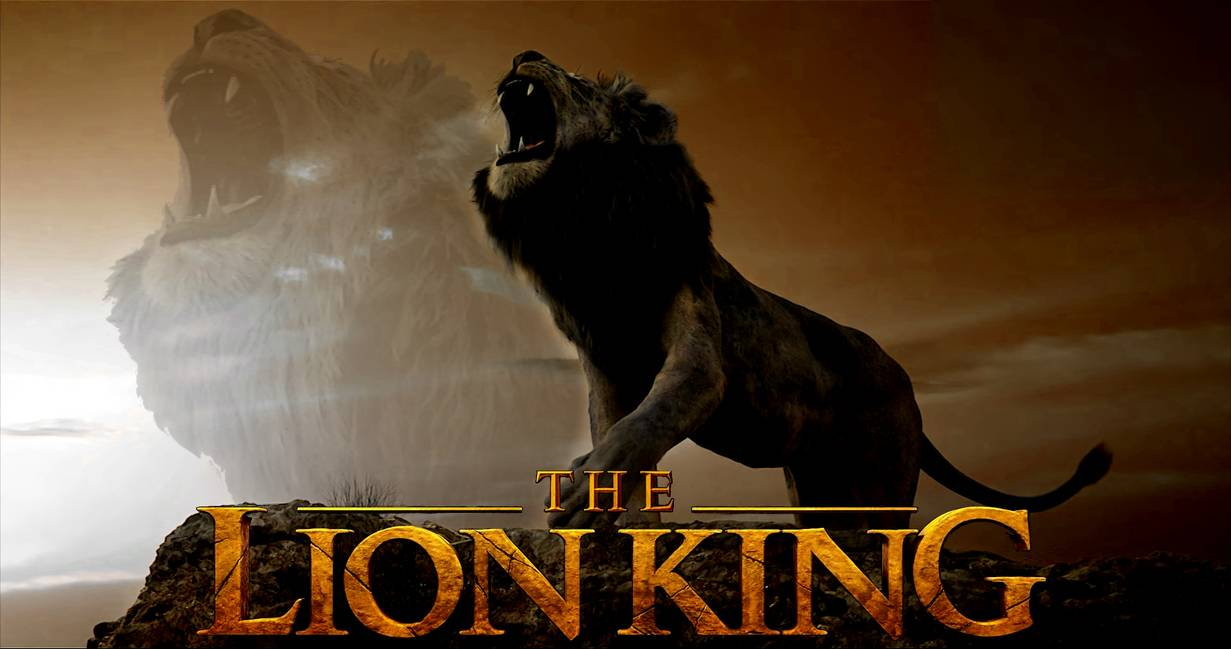

In [255]:
from IPython.display import Image
Image(filename='The LION KING.jpg')

<div class="alert alert-block alert-info" align=center><b></b>

# Problem Statement

Online reviews are important because they have become a reference point for buyers across the globe and because so many people trust them when making purchase decisions.


Reviews are also important for Search Engine Optimization (SEO). Having positive reviews is also another way through which you can improve a website’s Search Engine visibility. The more that people talk about a brand online, the greater its visibility to Search Engines, such as Google, Yahoo and Bing.


For the audience and booking websites, analysing reviews is significant in understanding reviewer opinion about the film. In movie booking websites, 90% of people first check out online reviews before purchasing tickets.
For the production house, analysing negative reviews can be useful for damage control.

<div class="alert alert-block alert-info" align=center><b></b>

# Business Understanding

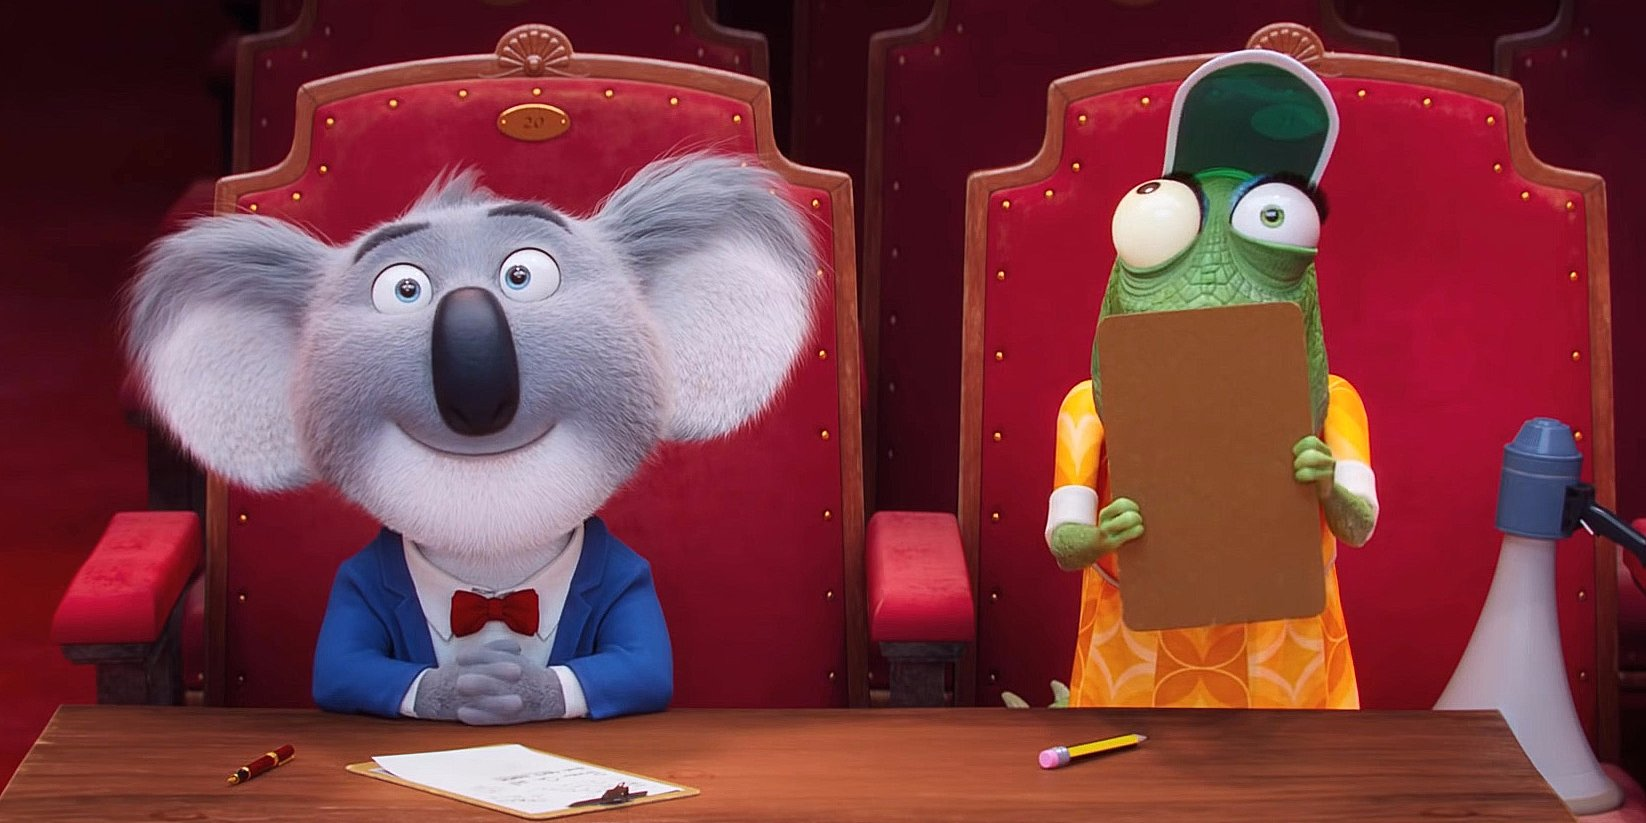

In [256]:
Image(filename='undefined.png')

THE LION KING(2019) is animated movie and it has their own viewers specially "kids" and people who like to understand about the animation as well director's work.
However they watch movies in two aspects: 
1st- They like to understand the type of animation used , 
2nd. They also would like to understand classification of movies in terms of sentiments.

After understanding the review and sentiments pertaining to globally, internal and external stakeholders can work accordingly for their upcoming movies and can do modifications to receive more business.

The review data available on rotten tometo website the same is real time data in text format, the same has been scrapped using web scrapping technique.

###### Further, based on other parameters/performance of the movie. movie can be rated as "outstanding" or "collapsed".However here we shall be using terms of sentiment [Outstanding - Positive Sentiment (0)] and [Collapsed - Negative Sentiment (1)] 

Business can utilize these performance ratings to understand the review of customer sentiments towards the movie. The same will help them to improve their strategies, practices, build better satisfactory movie and many more imporvements to reach the oustanding performance.

<div class="alert alert-block alert-info" align=center><b></b>

# Understanding as a Data Scientist

My aim is to build a AI agent (model) on LION KING reviews that will classify the review as positive and negative sentiment. Further, with the additional data provided i am suppose to classify review as "Positive Sentiment" and "Negative Sentiment". 
This classification is based on which side the customer reviews and score they have given! If the reviews are close to positive sentiment then that movie is classified as outstanding.

<div class="alert alert-block alert-info" align=center><b></b>

# LET'S START

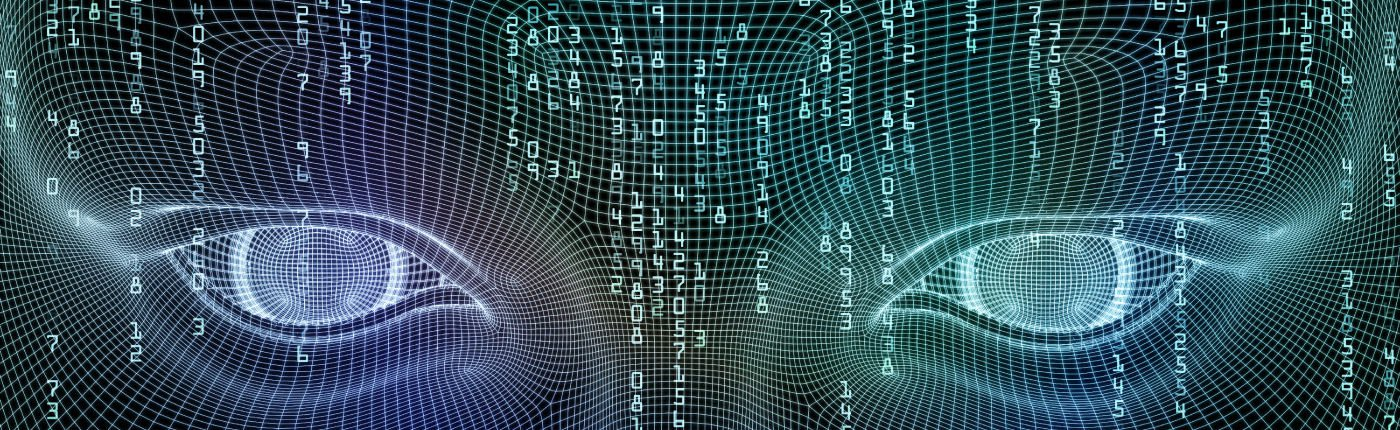

In [257]:
Image(filename='artificial_intelligence.jpg')

<div class="alert alert-block alert-info" align=center><b></b>
    
    --> Hello !! This is part-2 of THE LION KING Sentiment Analysis. 
        Here we will select features and prepare models web scrapped data and predict sentiment on given test data.
    

.

# TABLE OF CONTENT

Step- 1 : Import Libraries

Step -2 : Read Data

Step -3 : Cleaning Data / Pre-Processing

Step -4 : Model Building

Step -5 : Clustering

Step -6 : Model Selection and criteria

Step -7 : Summary and Conclusion

.

## Step- 1 : Import Libraries

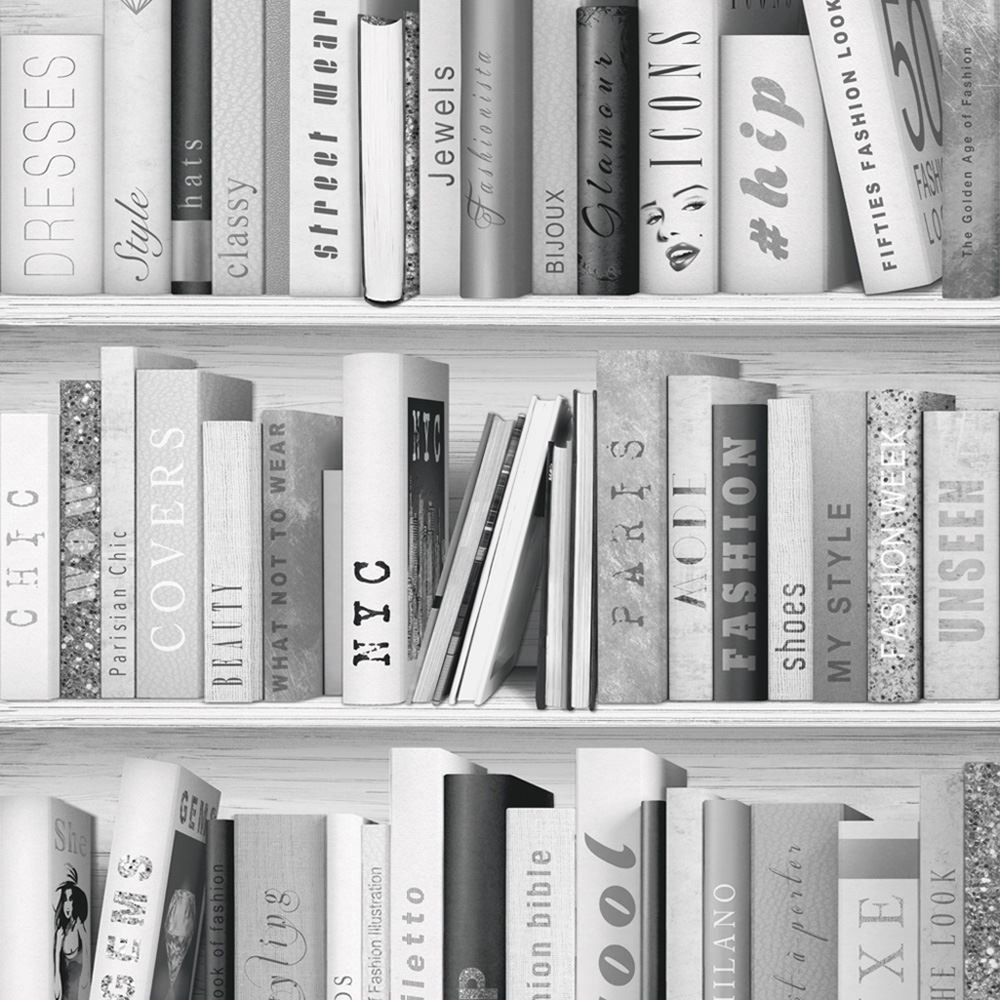

In [258]:
Image(filename='import_library.jpg')

In [259]:
#!pip install PyDrive
# !pip install gensim
# !pip install pyldavis
# !python -m spacy download en
#!pip install tpot

from bs4 import BeautifulSoup
import requests as rq
import urllib.request as url
from bs4 import BeautifulSoup as bs

import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time
nltk.download('wordnet')

import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy
import gzip
import en_core_web_sm

import gensim
from gensim import corpora

import warnings;
warnings.filterwarnings("ignore");

import os
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from oauth2client.client import GoogleCredentials

# !pip install vecstack
# !pip -q install shap
# !pip -q install lime
# !pip -q install eli5
# !pip install tpot
# !pip install hyperopt

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random as rnd

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

#library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random as rnd

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
#from tpot import TPOTClassifier
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold
import warnings
from sklearn.preprocessing import MinMaxScaler
#!pip install plotly.express
from imblearn.over_sampling import SMOTE
import itertools

[nltk_data] Downloading package stopwords to C:\Users\Tushit
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tushit
[nltk_data]     Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Step -2 : Read Data

In [260]:
data = pd.read_csv("LionKingData.csv")
test = pd.read_csv("test-1566619745327.csv")

In [261]:
data.head(2)

Unnamed: 0  index                createDate displayImageUrl displayName  \
0           0      0  2019-08-12T19:47:01.764Z             NaN       Annie   
1           1      1  2019-08-12T19:24:21.444Z             NaN         EvD   

   hasProfanity  hasSpoilers  isSuperReviewer  isVerified    rating  \
0         False        False            False        True  STAR_3_5   
1         False        False            False       False    STAR_5   

                                review  score timeFromCreation  \
0  it okay, but like the original one.    3.5     Aug 12, 2019   
1                loved the whole movie    5.0     Aug 12, 2019   

                 updateDate  \
0  2019-08-12T19:47:01.764Z   
1  2019-08-12T19:24:21.444Z   

                                                                                                                   user  
0  {'userId': '0D674552-99DA-4D4A-B515-82A04A16A95F', 'realm': 'Fandango', 'displayName': 'Annie', 'accountLink': None}  
1    {'userId': '4D4B7E6C-5BE9-48BE-B014-B0B9224651E1', 'realm': 'Fandango', 'displayName': 'EvD', 'accountLink': None}

In [262]:
test.head()

ReviewID  \
0     92876   
1     92877   
2     92878   
3     92879   
4     92880   

                                                                                                                                                   review  
0                                                                                   Was good. Nothing like the original but I believe that was the point.  
1  I absolutely loved it! A wonderful rendition of the original. Just dont compare to the cartoon version. Let this movie be its own and you will like it  
2                                              I love the movie! Good job director! \nI appreciate all the work some great people have put in for years.   
3                                                                    GREAT MOVIE!!  Same as the original, but the cinematography made a huge difference!!  
4                                                                                                                  Realistic.   Fantastic special effects

## Step -3 : Cleaning / Pre- Processing

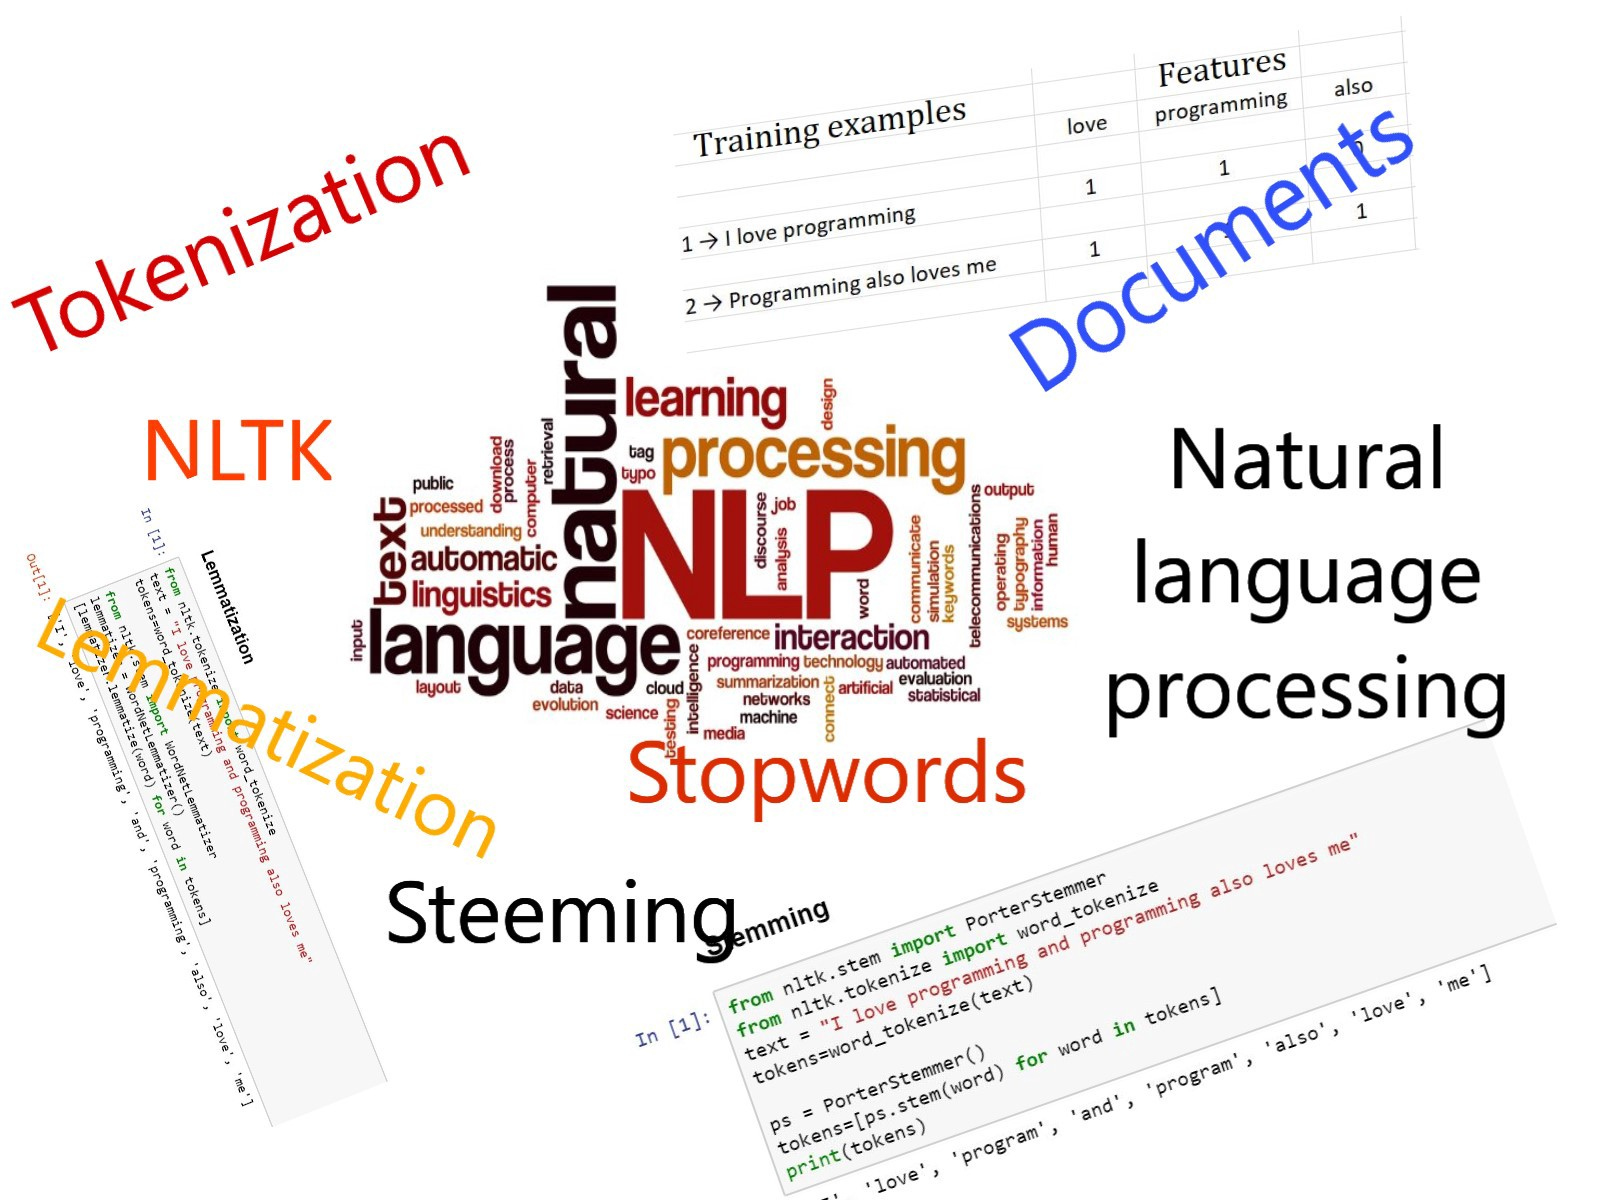

In [263]:
Image(filename='cleaning_preprocessing.png')

In [264]:
# Creating Target Variable "sentiment" from "score"
data['sentiment'] = [0 if x>3 else 1 for x in data['score']] # Creating a "sentiment" column based on score


# Concatenating both data set to meet dimensions during modelling
df1 = pd.concat([data,test])


# dropping:-  Unnamed: 0 , index , createDate , displayImageUrl , displayName , 
# dropping : - hasSpoilers , isVerified , rating , timeFromCreation,updateDate , user
df1.drop (['Unnamed: 0', 'index' ,'createDate','displayImageUrl' ,'displayName','hasSpoilers',
           'isVerified','rating','timeFromCreation','updateDate','user' ], axis =1 , inplace = True)

df1.drop (['hasProfanity', 'isSuperReviewer','score'] , axis = 1 , inplace = True)


#Regular Expresssion to store only alphabets (capital and small) and digits.
cleanup_re = re.compile('[^A-Za-z0-9]+') 


def cleanup(sentence):
    sentence = str(sentence)
    sentence = re.sub(r'\s+',' ',sentence) #\s is for white spaces
   # sentence = re.sub('[\d]','',sentence)  #\d is for digits
    sentence = sentence.lower() # converting into lower case
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence


# creating a dictionoary of de-contracted words that occur in common typing languages.
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"don\'t", "do not" , phrase)
    phrase = re.sub(r"isn\'t", "is not", phrase)
    phrase = re.sub(r"he\'s", "he is", phrase)
    phrase = re.sub(r"we\'re", "we are", phrase)
    phrase = re.sub(r"I\'ll", "I will", phrase)
    phrase = re.sub(r"you\'re", "you are", phrase)
    phrase = re.sub(r"they\'re", "they are", phrase)
    phrase = re.sub(r"we\'ll", "we will", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"didn\'t", "did not", phrase)
    phrase = re.sub(r"hasn\'t", "has not", phrase)
    phrase = re.sub(r"couldn\'t", "could not", phrase)
    phrase = re.sub(r"it\'s", "it is", phrase)
    phrase = re.sub(r"aren\'t", "are not", phrase)
    phrase = re.sub(r"wasn\'t", "was not", phrase)
    phrase = re.sub(r"weren\'t", "were not", phrase)
    phrase = re.sub(r"haven\'t", "have not", phrase)
    phrase = re.sub(r"hasn\'t", "has not", phrase)
    phrase = re.sub(r"hadn\'t", "had not", phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"wouldn\'t", "would not", phrase)
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"doesn\'t", "does not", phrase)
    phrase = re.sub(r"didn\'t", "did not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"shouldn\'t", "should not", phrase)
    phrase = re.sub(r"mightn\'t", "might not", phrase)
    phrase = re.sub(r"mustn\'t", "must not", phrase)
    

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# applying cleanup function on data
df1["Clean_review"] = df1["review"].apply(cleanup)


# applying decontracted function on data
df1["Clean_review"] = df1["review"].apply(decontracted) 

# converting all capital leters into small letters
df1['Clean'] = df1['Clean_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# regular expression tto remove punctuation
df1['Clean'] = df1['Clean'].str.replace('[^\w\s\!\.\?\,\'\:\;\..\-\_\()\[]\{}\!!]','') 

# from textblob importing word
from textblob import Word

# Lemmatizing the owrds using lemmatize()
df1['Clean_lemmed'] = df1['Clean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# printing the lemmatized words
df1['Clean_lemmed'].head().tolist()

# Checking top 5 values
df1.head()

ReviewID  \
0       NaN   
1       NaN   
2       NaN   
3       NaN   
4       NaN   

                                                                                                                                                                                                    review  \
0                                                                                                                                                                      it okay, but like the original one.   
1                                                                                                                                                                                    loved the whole movie   
2  I genuinely don’t know where the poor critic reviews came in. I lost interest in seeing the film due to their poor reviews but eventually got around to seeing it and truly thought they did a magni...   
3                                                                                                                                                                           Awesome, amazing, great movie!   
4  Five stars.  This was not only a treat for my husband and I but also our 6 year old grandson.  So many positives.  I kept on having to tell myself these were not real animals.  The only thing that...   

   sentiment  \
0        0.0   
1        0.0   
2        0.0   
3        0.0   
4        0.0   

                                                                                                                                                                                              Clean_review  \
0                                                                                                                                                                      it okay, but like the original one.   
1                                                                                                                                                                                    loved the whole movie   
2  I genuinely don’t know where the poor critic reviews came in. I lost interest in seeing the film due to their poor reviews but eventually got around to seeing it and truly thought they did a magni...   
3                                                                                                                                                                           Awesome, amazing, great movie!   
4  Five stars.  This was not only a treat for my husband and I but also our 6 year old grandson.  So many positives.  I kept on having to tell myself these were not real animals.  The only thing that...   

                                                                                                                                                                                                     Clean  \
0                                                                                                                                                                      it okay, but like the original one.   
1                                                                                                                                                                                    loved the whole movie   
2  i genuinely don’t know where the poor critic reviews came in. i lost interest in seeing the film due to their poor reviews but eventually got around to seeing it and truly thought they did a magni...   
3                                                                                                                                                                           awesome, amazing, great movie!   
4  five stars. this was not only a treat for my husband and i but also our 6 year old grandson. so many positives. i kept on having to tell myself these were not real animals. the only thing that cou...   

                                                                                                        

In [265]:
print("*-------------------*------------------------*----------------------*---------------------*----------------------*")
print("*-------------------*------------------------*----------------------*---------------------*----------------------*")
print("*-------------------*------------------------*----------------------*---------------------*----------------------*")
print("*-------------------*------------------------*----------------------*---------------------*----------------------*")

*-------------------*------------------------*----------------------*---------------------*----------------------*
*-------------------*------------------------*----------------------*---------------------*----------------------*
*-------------------*------------------------*----------------------*---------------------*----------------------*
*-------------------*------------------------*----------------------*---------------------*----------------------*


## Step -4 : Model Building

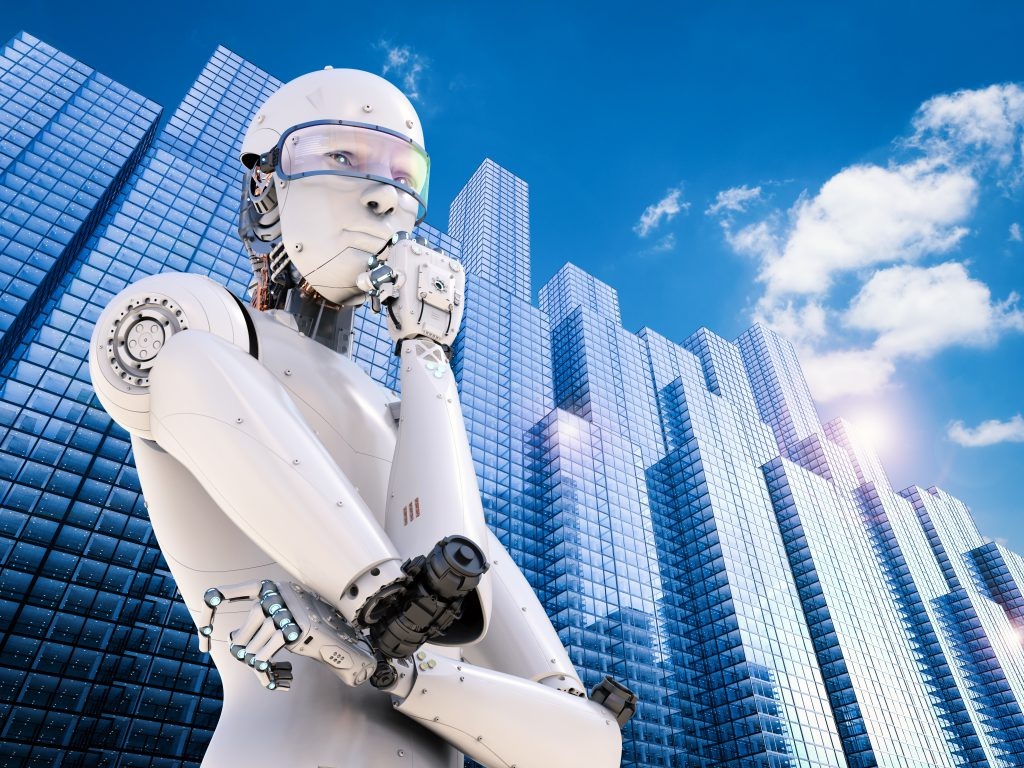

In [266]:
Image(filename='model building.jpg')

<div class="alert alert-block alert-info" align=center><b></b>
    
    --> Now Let's apply Machine Learning and Deep Learning techniques to build models
    

In [267]:
# Train Data defining index
train_data_index_last = 3240
# tv_tfidf_features[0:3239]

# test Data defining index
test_data_index_first = 3241
# tv_tfidf_features[3240:]

In [268]:
# defining column 
corpus = df1['Clean_lemmed'].tolist()

# TFIDF Vectorizer before passing the same to models
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tv = TfidfVectorizer(ngram_range=(1,2),
                     sublinear_tf=True,norm='l2',smooth_idf=True) # creating an object of TfidfVectorizer


tfidf_features = tv.fit_transform(corpus)  # fitting the above object on clean_lemmed column

In [269]:
# Defining Train and Test
X = tfidf_features[:train_data_index_last] # Train Data
y = df1['sentiment'][:train_data_index_last] # Test Data, where model predictions will take place

In [270]:
# Data is highly imbalanced as we have seen during the Exploratory Data Analysis- Refer Part:1 (Visulisation)

In [271]:
# Hence Applying SMOTE Over Sampling Technique
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(X, y)
# pd.DataFrame(X_SMOTE.todense(), columns=tv.get_feature_names())

In [272]:
# checking shape of fitting clean_lemmed column
tfidf_features.shape

(4440, 47431)

In [273]:
# Checking shape of X_SMOTE and y_SMOTE after over sampling
print(X_SMOTE.shape)
print(y_SMOTE.shape)

(4724, 47431)
(4724,)


<div class="alert alert-block alert-info" align=center><b></b>

## 1. Machine Learning 

####  1.1 : : Logistic Regression - SMOTE

In [274]:
from sklearn.metrics import f1_score

# Creating an object for logistic regression
lr = LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

#Using the object created for logistic regression to fit on train data
lr.fit(X_SMOTE, y_SMOTE)

#Using the object created for logistic regression to predict on train data
pred_lr_SMOTE = lr.predict(X_SMOTE)

#Calculating the f1_Score of train data
log_f1 = f1_score(y_SMOTE, pred_lr_SMOTE)
# Printing Logistic Regression f1 Score
log_f1

1.0

In [275]:
# converting index into dataframe and predicting on test data set
LR_Prediction = pd.DataFrame(lr.predict(tfidf_features[test_data_index_first:]))

In [276]:
# Converting the same to CSV format to check predictions

# LR_Prediction.to_csv('lr_prediction.csv')

####  1.2 : : Decision Tree - SMOTE

In [277]:
# Creating an object for Decision Tree Classifier
dt = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#Using the object created for Decision Tree Classifier to fit on train data
dt.fit(X_SMOTE, y_SMOTE)

#Using the object created for Decision Tree Classifier to predict on train data
pred_dt_SMOTE = dt.predict(X_SMOTE)

#Calculating the f1_Score of train data
DT_f1 = f1_score(y_SMOTE, pred_dt_SMOTE)
# Printing Decision Tree f1 score
DT_f1 

0.7909414971692179

In [278]:
# converting index into dataframe and predicting on test data set
dt_Prediction = pd.DataFrame(dt.predict(tfidf_features[test_data_index_first:]))

In [279]:
# Converting the same to CSV format to check predictions

# dt_Prediction.to_csv('dt_prediction.csv')

####  1.3 ::  Random Forest - SMOTE

In [280]:
# Creating an object for logistic regression
RF = RandomForestClassifier(bootstrap=False, criterion='gini', 
                            max_features=0.15000000000000002, min_samples_leaf=1, 
                            min_samples_split=3, n_estimators=100)

#Using the object created for Random Forest to fit on train data
RF.fit(X_SMOTE, y_SMOTE)

#Using the object created for Random Forestn to predict on train data
pred_rf_SMOTE = RF.predict(X_SMOTE)

#Calculating the f1_Score of train data
RF_f1 = f1_score(y_SMOTE, pred_rf_SMOTE)

# Printing Random Forest f1 score
RF_f1

In [281]:
RF_Prediction = pd.DataFrame(RF.predict(tfidf_features[test_data_index_first:])) # converting index into dataframe and predicting on test data set

In [282]:
# Converting the same to CSV format to check predictions

# RF_Prediction.to_csv('RF_prediction.csv')

####  1.4 : :  Extra Tree Classifier - SMOTE

In [283]:
ET = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#Using the object created for Extra Tree Classifier to fit on train data
ET.fit(X_SMOTE, y_SMOTE)

#Using the object created for Extra Tree Classifier to predict on train data
pred_et_SMOTE = ET.predict(X_SMOTE)

#Calculating the f1_Score of train data
ET_f1 = f1_score(y_SMOTE, pred_rf_SMOTE)

# Printing Extra Tree f1 Score
ET_f1

In [284]:
#   tfidf_features --- > TFIDF FIT
#  test_data_index_first ---- > defined value of test preidction

# converting index into dataframe and predicting on test data set
ET_Prediction = pd.DataFrame(ET.predict(tfidf_features[test_data_index_first:])) 


In [285]:
# Converting the same to CSV format to check predictions

#ET_Prediction.to_csv('ET_prediction.csv')

####  1.5 ::  Gradient Boosting- SMOTE

In [286]:
gb = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.8, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=900,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#Using the object created for Gradient Boosting to fit on train data
gb.fit(X_SMOTE, y_SMOTE)

#Using the object created for Gradient Boosting to predict on train data
pred_gb_SMOTE = gb.predict(X_SMOTE)

#Calculating the f1_Score of train data
GB_f1 = f1_score(y_SMOTE, pred_rf_SMOTE)

# Printing Gradient boosting f1 score
GB_f1

1.0

In [287]:
# converting index into dataframe and predicting on test data set
gb_Prediction = pd.DataFrame(gb.predict(tfidf_features[test_data_index_first:])) 


In [288]:
# Converting the same to CSV format to check predictions

# gb_Prediction.to_csv('gb_prediction.csv')


####  1.6 ::   SVC - SMOTE

In [289]:
svc = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#Using the object created for SVC to fit on train data
svc.fit(X_SMOTE, y_SMOTE)

#Using the object created for SVC to predict on train data
pred_svc_SMOTE = svc.predict(X_SMOTE)

#Calculating the f1_Score of train data
SVC_f1 =f1_score(y_SMOTE, pred_svc_SMOTE)

#Printing Support Vector Classifier f1 score
SVC_f1

1.0

In [290]:
# converting index into dataframe and predicting on test data set
svc_Prediction = pd.DataFrame(svc.predict(tfidf_features[test_data_index_first:]))  


In [291]:
# Converting the same to CSV format to check predictions
# svc_Prediction.to_csv('SVC_prediction.csv')

####  1.7 ::  KNeighbors - SMOTE

In [292]:
knn =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=400, p=2,
           weights='uniform')

#Using the object created for  KNeighbors to fit on train data
knn.fit(X_SMOTE, y_SMOTE)

#Using the object created for  KNeighbors to predict on train data
pred_knn_SMOTE = knn.predict(X_SMOTE)

#Calculating the f1_Score of train data
KNN_f1 = f1_score(y_SMOTE, pred_knn_SMOTE)

#printing KNN f1 score
KNN_f1

0.6666666666666666

In [293]:
# converting index into dataframe and predicting on test data set

knn_Prediction = pd.DataFrame(knn.predict(tfidf_features[test_data_index_first:])) 

In [294]:
# Converting the same to CSV format to check predictions

# knn_Prediction.to_csv('knn_prediction.csv')

####  1.8 :: AdaBoost - SMOTE

In [297]:
Ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=900, random_state=None)

#Using the object created for  KNeighbors to fit on train data
Ada.fit(X_SMOTE, y_SMOTE)

#Using the object created for  KNeighbors to predict on train data
pred_Ada_SMOTE = Ada.predict(X_SMOTE)

#Calculating the f1_Score of train data
Ada_f1 = f1_score(y_SMOTE, pred_knn_SMOTE)

# Printing Ada Boost f1 score
Ada_f1

0.6666666666666666

In [298]:
# converting index into dataframe and predicting on test data set

Ada_Prediction = pd.DataFrame(Ada.predict(tfidf_features[test_data_index_first:])) 

In [299]:
# creating a dataframe that will print the f1 score of train.
models_SMOTE = pd.DataFrame({
    'Model': ['Logistic Regression Classifier',
              'Decision Tree Classifier',
              'Random Forest Classifer',
              'ExtraTrees Classifier',
              'Gradient Boosting Classifier',
              'Support Vector Classifier',
             'KNeighbor Classifier',
             'Ada Boost Classifier'],
    
    'Score_train': [log_f1,
                    DT_f1,
                    RF_f1,
                    ET_f1,
                    GB_f1,
                    SVC_f1,
                    KNN_f1,
                    Ada_f1
                   ]
    })

models_SMOTE.sort_values(by='Score_train', ascending=False)

Model  Score_train
0  Logistic Regression Classifier     1.000000
2         Random Forest Classifer     1.000000
3           ExtraTrees Classifier     1.000000
4    Gradient Boosting Classifier     1.000000
5       Support Vector Classifier     1.000000
1        Decision Tree Classifier     0.790941
6            KNeighbor Classifier     0.666667
7            Ada Boost Classifier     0.666667

In [ ]:
print("*-------------*-------------------*---------------------*---------------------*---------------------*------------------")
print("*-------------*-------------------*---------------------*---------------------*---------------------*------------------")
print("*-------------*-------------------*---------------------*---------------------*---------------------*------------------")

<div class="alert alert-block alert-info" align=center><b></b>

## 2. STACKING

In [300]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    
    ('rfc', ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=400, p=2,
           weights='uniform')),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier()),
   ('lgbm',LGBMClassifier()),
    
    ('GB' , GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.8, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=900,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)),
    
    ('SVC', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)),
    
    ('DT' , DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')),
    
    ('LR' , LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)),
    
    ('ADA' , AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=900, random_state=None)),
    
    ('ET' , ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))
    
    

]

seed = 123
skf = model_selection.ShuffleSplit(n_splits = 1, test_size = .3, train_size = .6, random_state = seed )
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_SMOTE, y_SMOTE, scoring='f1')# cv  = skf)
vote_hard.fit(X_SMOTE, y_SMOTE)
#print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft,X_SMOTE, y_SMOTE,scoring='f1') # cv  = skf,
vote_soft.fit(X_SMOTE, y_SMOTE)

#print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Test w/bin score mean: 90.16
Hard Voting Test w/bin score 3*std: +/- 14.83
----------
Soft Voting Test w/bin score mean: 91.80
Soft Voting Test w/bin score 3*std: +/- 6.37
----------


<div class="alert alert-block alert-info" align=center><b></b>

## 3. GRID SEARCH

In [301]:
class GridModellingHelper:

    def __init__(self, std_param, grid_model,grid_param):
        if not set(grid_model.keys()).issubset(set(grid_param.keys())): 
        #       or not set(popt_models.keys()).issubset(set(popt_params.keys())) \
        #       or not set(automl_model.keys()).issubset(set(automl_params.keys())) \
        #       or not set(dl_model.keys()).issubset(set(dl_params.keys())):

        #     missing_params_grid = list(set(grid_models.keys()) - set(grid_params.keys()))
        #     missing_params_popt = list(set(popt_models.keys()) - set(popt_params.keys()))
        #     missing_params_automl = list(set(automl_model.keys()) - set(automl_params.keys()))
        #     missing_params_dl = list(set(dl_model.keys()) - set(dl_params.keys()))

            raise ValueError("Some estimators are missing parameters: %s" % missing_params_grid)
        
        self.std_param = std_param
        if self.std_param['Split_type'] == 'ShuffleSplit':
          self.cross_val = model_selection.ShuffleSplit(n_splits = self.std_param['folds'], test_size = self.std_param['test_size'], train_size = self.std_param['train_size'], random_state = self.std_param['seed'] )
        
        # self.base_model = base_model
        self.base_model_output = {}
        self.grid_model = grid_model
        self.grid_param = grid_param

        self.feature_importance_df_sorted = pd.DataFrame()
        self.important_col =[]
        
        self.scoring = { 'accuracy' : make_scorer(metrics.accuracy_score), 
                  'precision' : make_scorer(metrics.precision_score),
                  'recall' : make_scorer(metrics.recall_score), 
                  'f1_score' : make_scorer(metrics.f1_score),
                  'average_precision': make_scorer(metrics.average_precision_score),
                  'balanced_accuracy': make_scorer(metrics.balanced_accuracy_score),
                  'hamming_loss':make_scorer(metrics.hamming_loss),
                 'jaccard_similarity_score': make_scorer(metrics.jaccard_similarity_score),
                  'log_loss': make_scorer(metrics.log_loss),
                  'roc_auc_score':make_scorer(metrics.roc_auc_score),
                  'zero_one_loss':make_scorer(metrics.zero_one_loss,normalize=False)
                  }
                    
        self.best_param_output = {}
        self.best_estimator_output = {}
        self.best_score_output = {}
        self.scores_list = []
        # self.grid_searches = {}
        # self.best_params = {}
        self.feature_importance = {}
        self.FeatureImportanceAlgo = ['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier']
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=self.std_param['test_size'])
    
    def getScoreDictionary(self, base_model_output,modelname, basemodel_scores, score_type):
      self.base_model_output[modelname]['Time'] = basemodel_scores['mean_fit_time'].mean()
      self.base_model_output[modelname]['%s_accuracy' %score_type ] =  basemodel_scores['mean_%s_accuracy' %score_type].mean()
      self.base_model_output[modelname]['%s_precision' %score_type ] =  basemodel_scores['mean_%s_precision' %score_type].mean()
      self.base_model_output[modelname]['%s_recall' %score_type ] =  basemodel_scores['mean_%s_recall' %score_type].mean()
      self.base_model_output[modelname]['%s_f1_score' %score_type ] =  basemodel_scores['mean_%s_f1_score' %score_type].mean()
      self.base_model_output[modelname]['%s_average_precision' %score_type ] =  basemodel_scores['mean_%s_average_precision' %score_type].mean()
      self.base_model_output[modelname]['%s_balanced_accuracy' %score_type ] =  basemodel_scores['mean_%s_balanced_accuracy' %score_type].mean()
      self.base_model_output[modelname]['%s_hamming_loss' %score_type ] =  basemodel_scores['mean_%s_hamming_loss' %score_type].mean()
      self.base_model_output[modelname]['%s_jaccard_similarity_score' %score_type ] =  basemodel_scores['mean_%s_jaccard_similarity_score' %score_type].mean()
      self.base_model_output[modelname]['%s_log_loss' %score_type ] =  basemodel_scores['mean_%s_log_loss' %score_type].mean()
      self.base_model_output[modelname]['%s_roc_auc_score' %score_type ] =  basemodel_scores['mean_%s_roc_auc_score' %score_type].mean()
      self.base_model_output[modelname]['%s_zero_one_loss' %score_type ] =  basemodel_scores['mean_%s_zero_one_loss' %score_type].mean()

      return None

    def ModelLoop(self,X, y):
      for key, eachModel in self.grid_model.items():
          basemodel_scores = model_selection.GridSearchCV(eachModel, self.grid_param[eachModel.__class__.__name__], verbose=1, \
                                  cv  = self.cross_val,return_train_score=True, scoring=self.scoring, pre_dispatch="2*n_jobs", n_jobs=-1,refit='accuracy')
          basemodel_scores.fit(X,y)
          self.best_estimator_output[key] = basemodel_scores.best_estimator_
          self.best_param_output[key] = basemodel_scores.best_params_
          self.best_score_output[key] = basemodel_scores.best_score_
          modelname = eachModel.__class__.__name__
          self.base_model_output[modelname] = {}
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores.cv_results_, 'train')
          self.getScoreDictionary(self.base_model_output,modelname, basemodel_scores.cv_results_, 'test')
          self.scores_list.append(basemodel_scores)
          if eachModel.__class__.__name__ in self.FeatureImportanceAlgo:
            eachModel.fit(X,y)
            self.feature_importance[eachModel.__class__.__name__]= eachModel.feature_importances_

    def runBaseLineModel(self, X, y, auto_feature_eng = None , top_feature = None ):
      if top_feature:
        print ("Building model with only %s important feature" % top_feature)
        #Initial Model Loop to extract top feature
        self.ModelLoop(X, y)
        imp_df = self.getFeatureImportance(self.getFeatureImportanceDF(X, self.feature_importance))
        important_col = list(imp_df[:top_feature].index)
        self.important_col = important_col
        X = X[important_col]
        self.ModelLoop(X, y)
      else:
        print ("Building model without any important feature")
        self.ModelLoop(X, y)
        

    def getFeatureImportanceDF(self, X, feature_importance_dict, important_col=None):
      if important_col:
        feature_names = important_col
        feat_imp_df = pd.DataFrame.from_dict(feature_importance_dict)
        feat_imp_df.index = feature_names
        return feat_imp_df
      else:
        feature_names = X.columns
        feat_imp_df = pd.DataFrame.from_dict(feature_importance_dict)
        feat_imp_df.index = feature_names
        return feat_imp_df

    def getFeatureImportance(self,feat_imp_df):
      mms = MinMaxScaler()
      # scaling to MinMax Scale 
      scaled_fi = pd.DataFrame(data=mms.fit_transform(feat_imp_df),columns=feat_imp_df.columns,index=feat_imp_df.index)
      # Adding all values of importance to get single socre
      scaled_fi['SumofImp'] = scaled_fi.sum(axis=1)
      # print(scaled_fi.head())
      ordered_ranking = scaled_fi.sort_values('SumofImp', ascending=False)
      return ordered_ranking


    def getFeatureImportanceGraph(self,ordered_feature_importance_df):
      self.feature_importance_df_sorted.append(ordered_feature_importance_df)
      fig, ax = plt.subplots(figsize=(10,7), dpi=80)
      sns.barplot(data=ordered_feature_importance_df, y=ordered_feature_importance_df.index, x='SumofImp', palette='magma')
      ax.spines['right'].set_visible(False)
      ax.spines['top'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      ax.xaxis.set_visible(False)
      ax.grid(False)
      ax.set_title('Aggregated Feature Importances for Models');
      return ax

    def getModelDataframe(self, base_model_output, sort_column, asscending=False,difference_by=None, score_filter=None):
      score_table =  pd.DataFrame.from_dict(base_model_output).T
      if score_filter:
        score_columns = [['train_'+ eachScore,'test_'+eachScore] for eachScore in score_filter]
        score_columns_flat = list(itertools.chain(*score_columns))
        score_columns_flat.append("Time")
        score_table = score_table[score_columns_flat]
      score_table['Difference_%s_unit'%difference_by] = abs(score_table['train_%s' %difference_by] - score_table['test_%s' %difference_by])*100
      score_table_ordered = score_table.sort_values(sort_column, ascending=asscending)
      return score_table_ordered
    
    def getModelValidationGraph(self, ModelDataFrame, x_col= None, Difference_bins=5,difference_col=None,size=None):
      ModelDataFrame['MLName'] = ModelDataFrame.index
      ModelDataFrame['Difference_Bin'] = pd.cut(ModelDataFrame[difference_col],Difference_bins)
      ax = plt.figure(figsize=(18,8))
      # sns.scatterplot(x=x_col, y="MLName",data=ModelDataFrame,size='Time', hue='Difference_Bin',sizes=(20, 600), hue_norm=(0, 20))
      fig = px.scatter(ModelDataFrame, x=x_col, y="MLName", color="Difference_Bin",size=size)
      # fig.show()
      # ax.grid(False)
      # ax.set_title('Model Validation & Overfitting');
      return fig



In [302]:


basic_params = {
  'seed':123,
  'folds': 10,
  'test_size': 0.3,
  'train_size': 0.7,
  'n_jobs':-1,
  'verbose':3,
  'scoring':'f1',   
  'Split_type': 'ShuffleSplit',
  'warning': warnings.filterwarnings('ignore'),
  'normalize': True
      #StratifiedKFold() - StratifiedKFold
      #KFold() - KFold
  
}

base_model = {
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GaussianProcessClassifier':gaussian_process.GaussianProcessClassifier(),
    'LogisticRegressionCV':linear_model.LogisticRegressionCV(),
    'PassiveAggressiveClassifier':linear_model.PassiveAggressiveClassifier(),
    'RidgeClassifierCV':linear_model.RidgeClassifierCV(),
    'SGDClassifier':linear_model.SGDClassifier(),
    'Perceptron':linear_model.Perceptron(),
    'BernoulliNB':naive_bayes.BernoulliNB(),
    'GaussianNB':naive_bayes.GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'SVC':svm.SVC(probability=True),
    'NuSVC':svm.NuSVC(probability=True),
    'LinearSVC':svm.LinearSVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'LinearDiscriminantAnalysis':discriminant_analysis.LinearDiscriminantAnalysis(),
    'QuadraticDiscriminantAnalysis':discriminant_analysis.QuadraticDiscriminantAnalysis(),
    'XGBClassifier':XGBClassifier(),
    'LGBMClassifier':LGBMClassifier()    

}
grid_model = {
    
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
    
}

grid_param = {
    'LogisticRegression': { "C":np.logspace(-3,3,7), "penalty":["l1","l2"] }, 
    'DecisionTreeClassifier': {'criterion' : ['gini', 'entropy'], 'splitter' : ['random', 'best'], 'max_depth':[100,200,800], 'min_samples_leaf':[100,200,500]},
    'RandomForestClassifier': { 'n_estimators': [400,600,900] },
    'ExtraTreesClassifier': { 'n_estimators': [400,600,900] },
    'KNeighborsClassifier':{ 'n_neighbors': [400,600,900], 'algorithm' : ['auto']},
    'AdaBoostClassifier':  { 'n_estimators': [400,600,900] },
    'GradientBoostingClassifier': { 'n_estimators': [400,600,900], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

In [303]:
ModelObjectGrid = GridModellingHelper(basic_params,grid_model,grid_param)

In [304]:
ModelObjectGrid.runBaseLineModel(X_SMOTE,y_SMOTE)

Building model without any important feature
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.9min finished


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   49.2s finished


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 20.4min finished


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.7min finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 50.2min finished


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 39.7min finished


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 27.3min finished


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 35.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 55.9min finished


In [305]:
import itertools
ModelObjectGrid.getModelDataframe(ModelObjectGrid.base_model_output,sort_column=['Difference_zero_one_loss_unit','test_precision'],asscending=[True, True],difference_by='zero_one_loss',score_filter=['f1_score','precision','recall','zero_one_loss','hamming_loss'])

train_f1_score  test_f1_score  train_precision  \
ExtraTreesClassifier              1.000000       0.920845         1.000000   
GradientBoostingClassifier        1.000000       0.901023         1.000000   
RandomForestClassifier            1.000000       0.895063         1.000000   
AdaBoostClassifier                0.999699       0.885182         0.999719   
LogisticRegression                0.778036       0.736228         0.771061   
DecisionTreeClassifier            0.705049       0.703786         0.710484   
SVC                               0.604024       0.578610         0.600875   
KNeighborsClassifier              0.667831       0.663806         0.501331   

                            test_precision  train_recall  test_recall  \
ExtraTreesClassifier              0.922128      1.000000     0.919679   
GradientBoostingClassifier        0.885964      1.000000     0.916759   
RandomForestClassifier            0.905054      1.000000     0.885510   
AdaBoostClassifier                0.873738      0.999679     0.897122   
LogisticRegression                0.713953      0.813234     0.790952   
DecisionTreeClassifier            0.707155      0.707094     0.708175   
SVC                               0.565360      0.734261     0.725049   
KNeighborsClassifier              0.496897      1.000000     1.000000   

                            train_zero_one_loss  test_zero_one_loss  \
ExtraTreesClassifier                   0.000000          111.400000   
GradientBoostingClassifier             0.000000          141.950000   
RandomForestClassifier                 0.000000          146.266667   
AdaBoostClassifier                     1.000000          164.000000   
LogisticRegression                   511.492857          279.521429   
DecisionTreeClassifier               965.686111          414.041667   
SVC                                 1088.133333          510.433333   
KNeighborsClassifier                1648.600000          713.400000   

                            train_hamming_loss  test_hamming_loss        Time  \
ExtraTreesClassifier                  0.000000           0.078561  230.657745   
GradientBoostingClassifier            0.000000           0.100106  216.094412   
RandomForestClassifier                0.000000           0.103150  104.233303   
AdaBoostClassifier                    0.000302           0.115656  170.467105   
LogisticRegression                    0.154717           0.197124    0.475663   
DecisionTreeClassifier                0.292101           0.291990    0.396574   
SVC                                   0.329139           0.359967   12.922209   
KNeighborsClassifier                  0.498669           0.503103    0.027392   

                            Difference_zero_one_loss_unit  
ExtraTreesClassifier                         11140.000000  
GradientBoostingClassifier                   14195.000000  
RandomForestClassifier                       14626.666667  
AdaBoostClassifier                           16300.000000  
LogisticRegression                           23197.142857  
DecisionTreeClassifier                       55164.444444  
SVC                                          57770.000000  
KNeighborsClassifier                         93520.000000

<div class="alert alert-block alert-info" align=center><b></b>

## 4. DEEP LEARNING

In [40]:
from keras.utils import to_categorical
X = data['review']
y = to_categorical(data['sentiment'])
num_classes = data['sentiment'].nunique()
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [41]:
seed = 101 # fix random seed for reproducibility
np.random.seed(seed)

In [42]:
# Spilt Train Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2592,) (648,) (2592, 2) (648, 2)


In [43]:
# Tokenize Text
from keras.preprocessing.text import Tokenizer
max_features = 15000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [44]:
from keras.preprocessing import sequence
max_words = 30 #max(totalNumWords)
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(2592, 30) (648, 30)


In [65]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 256
epochs = 10

In [66]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [67]:
def model_train(model):
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)
    # plot train history
    plot_model_history(model_history)

In [68]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [69]:
from sklearn.metrics import f1_score

In [70]:
def model_evaluate(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(f1_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 1,080,602
Trainable params: 1,080,602
Non-trainable params: 0
_________________________________________________________________
None
Train on 2592 samples, validate on 648 samples
Epoch 1/10
 - 7s - loss: 0.6335 - acc: 0.7064 - val_loss: 0.5731 - val_acc: 0.7284
Epoch 2/10
 - 4s - loss: 0.5440 - acc: 0.7292 - val_loss: 0.5354 - val_acc: 0.7284
Epoch 3/10
 - 4s - loss: 0.5035 - acc: 0.7303 - val_loss: 0.4965 - val_acc: 0.7284
Epoch 4/10
 - 4s - loss: 0.4353 - acc: 0.7793 - val_loss: 0.4490 - val_acc: 0.7454
Epoch 5/10
 

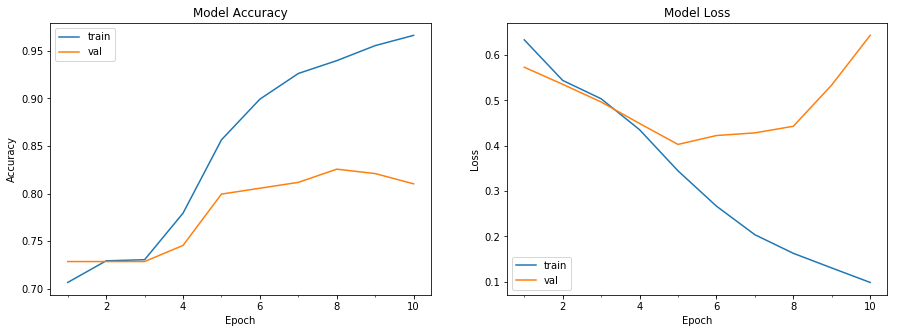

In [71]:
# train the model
max_features = 10000
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

Accuracy:	61.0%


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       472
           1       0.69      0.55      0.61       176

   micro avg       0.81      0.81      0.81       648
   macro avg       0.77      0.73      0.74       648
weighted avg       0.80      0.81      0.80       648



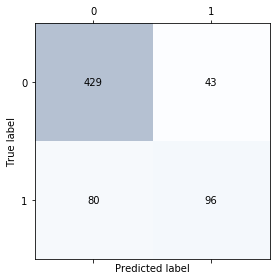

In [72]:
# evaluate model with test set
model_evaluate()

<div class="alert alert-block alert-info" align=center><b></b>

## 5. TPOT EXPERIMENT

In [96]:
# TPOT Experiment

from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_SMOTE.toarray(), y_SMOTE,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=200, population_size=50, verbosity=2,scoring="f1")
tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.9042765685079738
Generation 2 - Current best internal CV score: 0.9042765685079738


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LogisticRegression(input_matrix, C=10.0, dual=True, penalty=l2)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=200,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=50,
        random_state=None, scoring='f1', subsample=1.0, template=None,
        use_dask=False, verbosity=2, warm_start=False)

## Step -5 :Clustering

##### Kmeans clustering.
a. Take only ‘reviews’ attribute from train data and label them into two clusters using any clustering algorithm of your choice. b. compare the cluster labels with the train data target attribute - ‘sentiment’ and Write a brief comparison report with your observations

In [204]:
#Storing the review decsription as a list
review_description_data = data['review'].values.tolist()
#copying the web_description list to web docs and printing
data_docs = review_description_data
# data_docs

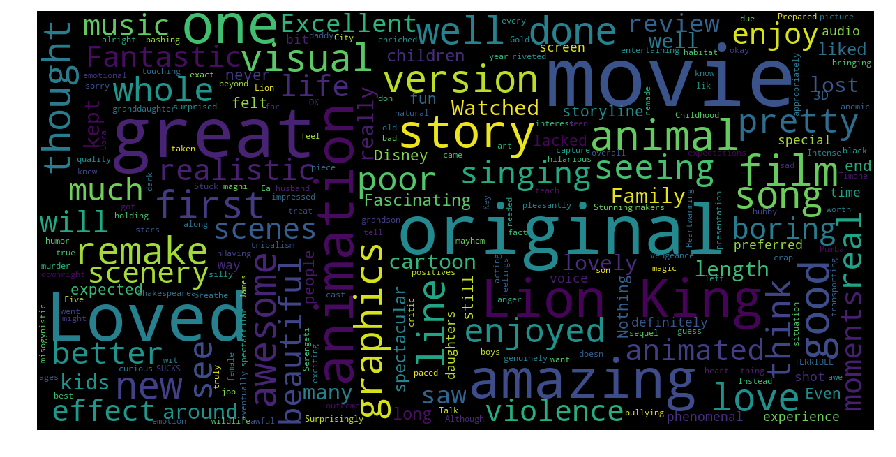

In [205]:
from wordcloud import WordCloud

mpl.rcParams['font.size']=12     # font size            
mpl.rcParams['savefig.dpi']=100          
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black', # background color is set to black
        max_words=300, # maximum number of words
        max_font_size=40, # maximum font size is 40
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(data["review"])
# Wordcloud for review Description from main data

###### Web - Scrapped data

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,2)) # creating an TfidfVectorizer object
df_web_vect = tfidf.fit_transform(data['review']) # using TfidfVectorizer to get the tfidf of the review description

df_web_vect # printing the tfidf_vect

<3240x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 34737 stored elements in Compressed Sparse Row format>

In [207]:
df_web_vect = df_web_vect.todense() # converting to dense matrix from a sparse matrix
df_web_vect_1 = pd.DataFrame(df_web_vect) # converting it to dataframe from a numpy array
df_web_vect_1.shape# printing the shape of df_web_vect_1 to get the number of rows and columns.

(3240, 1000)

In [216]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2) #using KMeans clustering to get 2 clusters
predicted_label = model.fit(df_web_vect_1)  # Clustering the tfidf of review description into 2 clusters
cluster_tfidf_web = model.labels_.tolist() # converting in to a list format

In [217]:
#Storing the description in a variable review
review=data.review

In [218]:
# Storing the cluster values in another varaible "Cluster_tfidf"
Cluster_tfidf_web = cluster_tfidf_web

# Converting "Cluster_tfidf" into a dataframe
Cluster_tfidf_web = pd.DataFrame({'Cluster': Cluster_tfidf_web})

# Concatenating the review description with the cluster values
result_Cluster_tfidf_web = pd.concat([review,Cluster_tfidf_web], axis=1)

In [219]:
# printing the value_counts of each clusters
result_Cluster_tfidf_web.Cluster.value_counts()

0    2778
1     462
Name: Cluster, dtype: int64

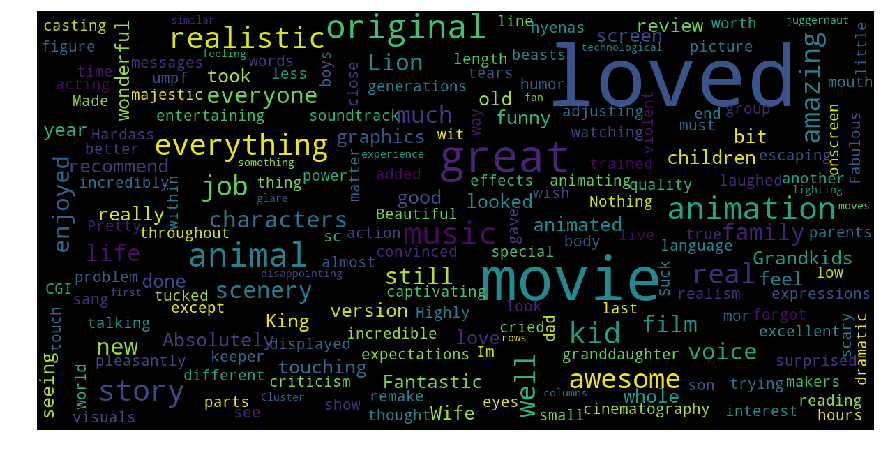

In [220]:
show_wordcloud(result_Cluster_tfidf_web[['review', "Cluster"]][result_Cluster_tfidf_web.Cluster==1])

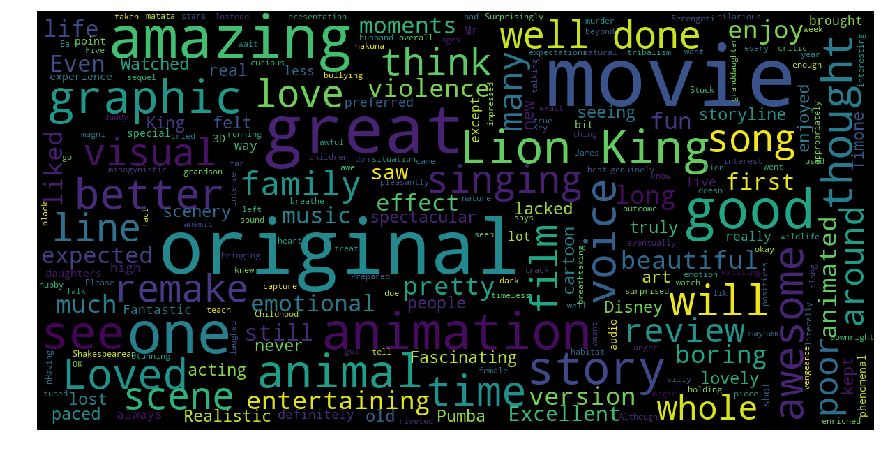

In [221]:
show_wordcloud(result_Cluster_tfidf_web[["review", "Cluster"]][result_Cluster_tfidf_web.Cluster==0])

###### Test Data

In [222]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,2)) # creating an TfidfVectorizer object
df_given_vect = tfidf.fit_transform(test['review'])  # using TfidfVectorizer to get the tfidf of the text review description

df_given_vect # printing the test_vect

<1200x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 13293 stored elements in Compressed Sparse Row format>

In [223]:
df_given_vect = df_given_vect.todense() # converting to dense matrix from a sparse matrix
df_given_vect1 = pd.DataFrame(df_given_vect) # converting it to dataframe from a numpy array
df_given_vect1.shape # printing the shape of train_vect_df to get the number of rows and columns.

(1200, 1000)

In [224]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2) #using KMeans clustering to get 2 clusters
predicted_label = model.fit(df_given_vect1) # Clustering the tfidf of review description into 2 clusters
cluster_tfidf_given = model.labels_.tolist() # converting in to a list format

In [227]:
#Storing the description in an variable review description
review = test.review

In [228]:
# Storing the cluster values in another varaible "Cluster_tfidf_test"
Cluster_tfidf_given = cluster_tfidf_given

# Converting "Cluster_tfidf_test" into a dataframe
Cluster_tfidf_given = pd.DataFrame({'Cluster': Cluster_tfidf_given})

# Concatenating the review description with the cluster values
result_Cluster_tfidf_given = pd.concat([review,Cluster_tfidf_given], axis=1)

In [229]:
# printing the value_counts of each clusters
result_Cluster_tfidf_given.Cluster.value_counts()

0    990
1    210
Name: Cluster, dtype: int64

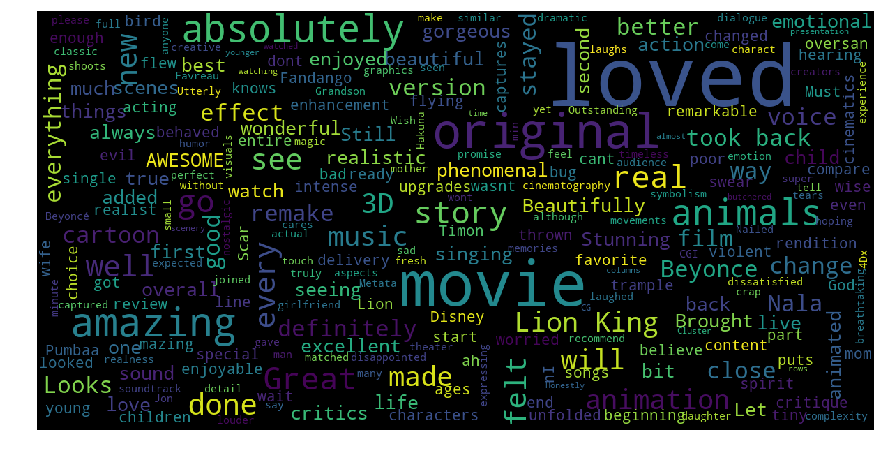

In [230]:
#Printing the most common words in cluster 1
show_wordcloud(result_Cluster_tfidf_given[["review", "Cluster"]][result_Cluster_tfidf_given.Cluster==1])

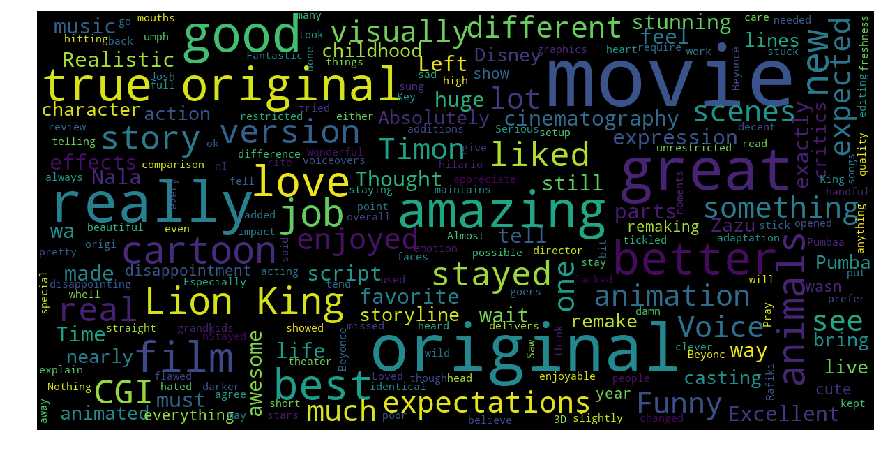

In [231]:
#Printing the most common words in cluster 2
show_wordcloud(result_Cluster_tfidf_given[["review", "Cluster"]][result_Cluster_tfidf_given.Cluster==0])

## Plotting the clusters with TSNE

In [232]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2,init= 'random', random_state= 5) # creating an object of KMeans clustering.

km.fit(Cluster_tfidf_web)   # Clustering the web_docs(web review description stored during cluster) into 2 clusters
df_clustered = pd.DataFrame(km.labels_, data.index)
labels = km.labels_
# creating a dataframe of cluster values and web_data index values
clustered_series_web = pd.Series(index=data.index, data=labels)
clustered_series_web.value_counts().head()

0    2778
1     462
dtype: int64

In [233]:
#taking only 100 data points for plotting
tsne_data = Cluster_tfidf_web[0:3000]

In [234]:
np.array(Cluster_tfidf_web).shape

(3240, 1)

In [235]:
#taking only 100 data points for plotting
labels_100 = labels[0:3000,]

In [236]:
# Ignore Warning
from sklearn.manifold import TSNE
X_tsne = TSNE(random_state=1337).fit_transform(tsne_data)
X_tsne_df = pd.DataFrame(X_tsne, columns = ['X_tsne_1', 'X_tsne_2'])
X_tsne_df['labels'] = labels_100

In [237]:
X_tsne_df.head()

X_tsne_1   X_tsne_2  labels
0 -1.602382  -3.706509       0
1  8.965685  17.079159       1
2 -1.602332  -3.706401       0
3 -1.602375  -3.706455       0
4 -1.602332  -3.706401       0

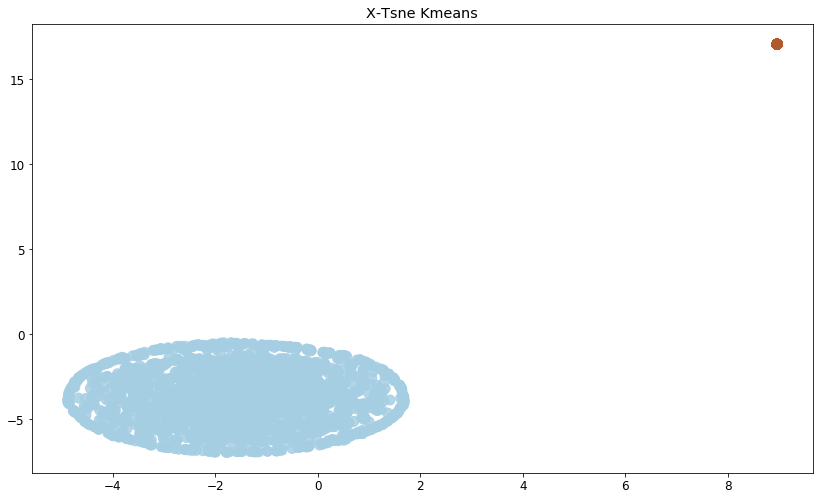

In [238]:
# Create the figure
fig = plt.figure( figsize=(14,8))
ax = fig.add_subplot(1, 1, 1, title='X-Tsne Kmeans' )
# Create the scatter
ax.scatter(
    x=X_tsne_df['X_tsne_1'], 
    y=X_tsne_df['X_tsne_2'], 
    c=X_tsne_df['labels'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.85,
    s=100)

In [239]:
# Given Data clustering

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,init= 'random', random_state= 5)
km.fit(Cluster_tfidf_given)
df_clustered = pd.DataFrame(km.labels_, test.index)
given_labels = km.labels_

given_clustered_series = pd.Series(index=test.index, data=given_labels)
given_clustered_series.value_counts().head()

1    990
0    210
dtype: int64

In [240]:
#taking only 100 data points for plotting
given_tsne_data = Cluster_tfidf_given[0:1200]

In [241]:
np.array(Cluster_tfidf_given).shape

(1200, 1)

In [242]:
#taking only 100 data points for plotting
given_labels_100 = given_labels[0:1200,]

In [243]:
# Ignore Warning

Y_tsne = TSNE(random_state=1337).fit_transform(given_tsne_data)
Y_tsne_df = pd.DataFrame(Y_tsne, columns = ['X_tsne_1', 'X_tsne_2'])
Y_tsne_df['labels'] = given_labels_100

In [244]:
Y_tsne_df.head()

X_tsne_1   X_tsne_2  labels
0  0.413609  -6.255486       1
1 -1.562787  20.447098       0
2  0.413644  -6.255500       1
3  0.413660  -6.255462       1
4  0.413644  -6.255352       1

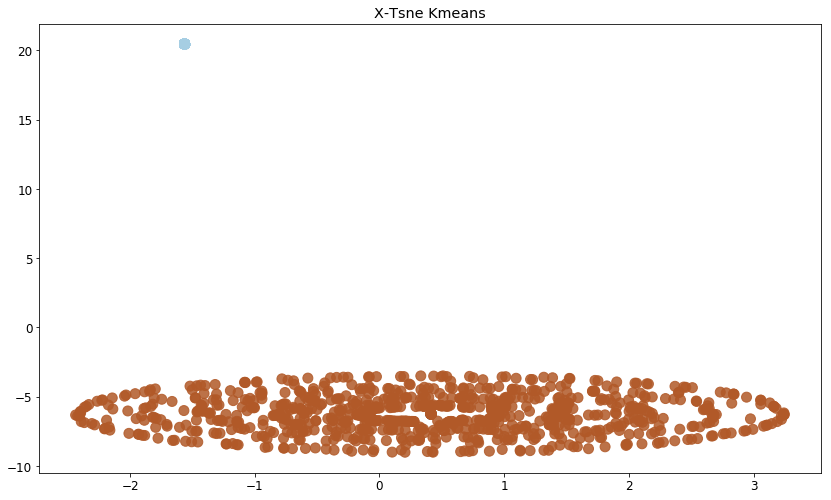

In [245]:
# Create the figure
fig = plt.figure( figsize=(14,8))
ax = fig.add_subplot(1, 1, 1, title='X-Tsne Kmeans' )
# Create the scatter
ax.scatter(
    x=Y_tsne_df['X_tsne_1'], 
    y=Y_tsne_df['X_tsne_2'], 
    c=Y_tsne_df['labels'], 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.85,
    s=100)

## Step -6 : Model Selection and criteria

<div class="alert alert-block alert-info" align=center><b></b>
    
    --> Best f1 Score on test data was obtained from Support Vector Classifier and soft-voting classifier(Stacking) 
    methods -> 0.74
    However
    Based on selection criteria model will be "Extra Tree Classifier" , The same gave f1 score -> 0.68

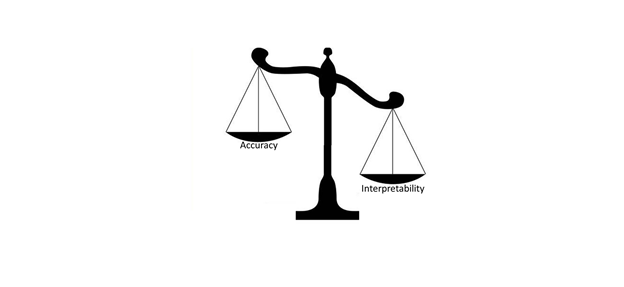

In [306]:
Image(filename='unnamed.png')

<div class="alert alert-block alert-info" align=center><b></b>
    
    --> Keeping the three rules for model selection :- Accuracy, Interpretability and Computational complexity
    
    Selected model is "Extra Tree Classifier" as production model for the given test data set.
    
    
    
"Accuarcy" -> Support Vector Classifier has best accuracy and f1- score compare to others on test data set.
    
"Interpretability" -> Support Vector Classifier is one of the best models on text classification and easy to intrpret. It
 can reduce the complexity of parameters
    
"Computational complexity" -> Computationally, SVC at par compare to other algoritham i.e. - XG BOOST, RANDOM FOREST ,
 DECISION TREE, SVC The same took around 5.7 Min. to run and gave f1_score-> 0.68 in comparison with others. However SVC Model provided best f1_score of 0.74 but computational complexity was around 1 hour.

## Step -7 : Summary and conclusion

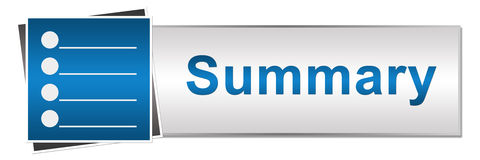

In [247]:
Image(filename='summary.jpg')

In the project the assigned task to cluster the review Description into UFDP (Un-fair and deceptive business practice) and Non – UFDP and then along with the target attribute-"sentiment" provided classify movie's sentiment as "positive sentiment" and "Negative sentiment".

.

###### Web Scrapping technique has been applied to scrap text review data from Rotton Tomato website (https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user) for newly released movie " THE LION KING (2019). which was available on theatre from 19th July 2019 onwards globally.

###### As a Data Scientist , We had to scrap 3000 reviews from rotten tometo website and start initializing the data using various techniques, we also need to build models on web scrapped data and predict on test data.

###### We have to clean the "review" feature by the techniques of text mining. Here various techniques i.e. small letters,removed punctuation, removed stop words, removed words that occured commonly, removed words that occured rarely, tokenized etc. has been applied on "review" descripion,calculated tf-idf for the "review" descripion. Converted the text data into vector representation using tfidf technique.

###### Exploratory Data Analysis - During Exploratory Data Analysis , Data has been explored in various ways i.e. seperation of Negative and postitive words and sentiment , Polarity Calculation , Best words on postive sentiment , Best words on negative sentiment, Most frequent words etc has been applied and developed new features in EDA sheet- PART-1.

###### Various columns has been dropped on Sentiment Analysis and "review"/"Clean_review" / "Clean_lemmetized" has been considered one of the best features on sentiment analysis.

###### Various Models i.e. Random Forest , XGBOOST, Extra Tree Classifier , Support Vector Classifier , Decision Tree , KNN etc has been applied and tuned to receive best accuracy.

###### In First submission, Extra Tree Classifier gave f1 Score- 0.68 and later SVC and Stacking gave one of the best f1 score - 0.74.



.

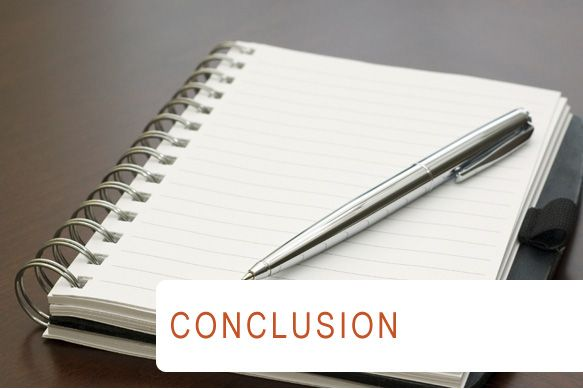

In [248]:
Image(filename='conclusion.jpg')

###### Clustered the review descripion in two labels "1" and "0". In above detailed architecture review descripion's vector value is closer to sentiment then it is classified as UFDP otherwise as Non UFDP.

.

###### Recommendation to Business:- to use this AI agent on sentiment analysis and build future movies based on recommandations. Above AI agent will save a lot of time, money and keeping other aspects in mind it will help the business grow rapidly.

.

What else can be tried?

Can be applied more Deep Learning based Algorithams i.e. CNN, RNN , LUDWIG , Stochastic Gradient Descent , Batch Normalization etc to check f1- scores.

However !!!

Machine Learning algoritham gave very good results.


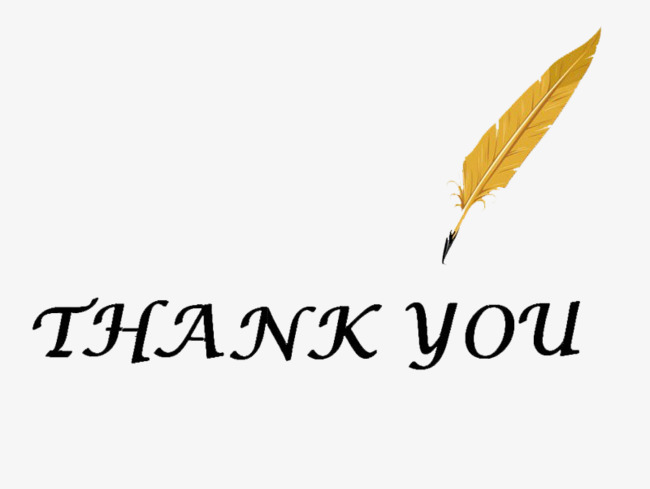

In [250]:
Image(filename='THANKS YOU.jpg')